In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Read data set

In [5]:
#read heart.csv
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
heart.info() #check info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Preprocessing 

In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#check the null values 
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [42]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

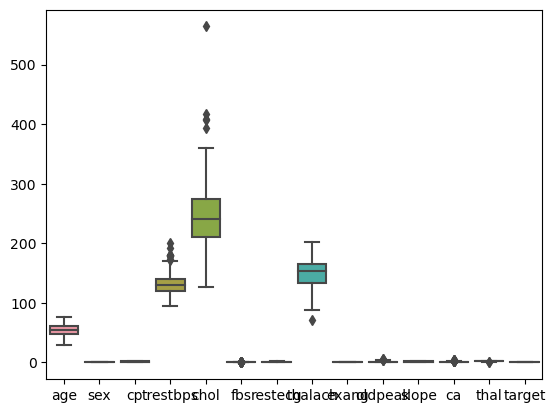

In [9]:
sns.boxplot(heart) ## Visualize boxplot to check the outliers

It defines outliers as observations that fall below Q1 - k * IQR or above Q3 + k * IQR, where Q1 and Q3 are the first and third quartiles, and IQR is the interquartile range

In [11]:
Q1 = heart.quantile(0.25)
Q3 = heart.quantile(0.75)
IQR = Q3 - Q1
k = 1.5

heart_data = heart[(heart >= Q1 - k * IQR) & (heart <= Q3 + k * IQR)]

In [12]:
heart_data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,NaN,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,68,1,0,144.0,193.0,NaN,1,141.0,0,3.4,1,2.0,3.0,0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,0


<Axes: >

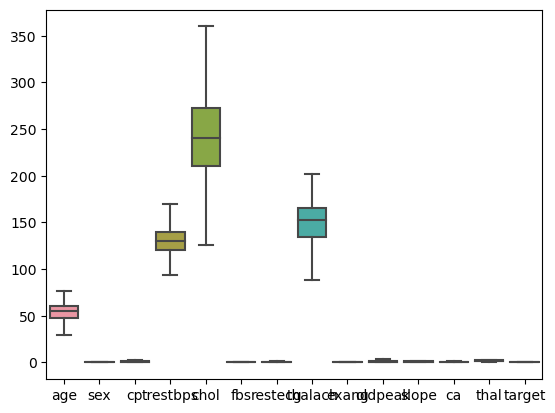

In [13]:
sns.boxplot(heart_data) #removed outlier data

In [17]:
heart_data.isna().sum()

age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          25
thal         2
target       0
dtype: int64

In [23]:
heart_data = heart_data.dropna() 
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [50]:
# Identifying duplicate
duplicate = heart_data.duplicated().sum()
duplicate

0

In [30]:
x = heart_data.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0
5,57,1,0,140.0,192.0,0.0,1,148.0,0,0.4,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124.0,197.0,0.0,1,136.0,1,0.0,1,0.0,2.0
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0


In [32]:
y = heart_data.iloc[:,-1]
y

1      1
2      1
3      1
4      1
5      1
      ..
296    0
298    0
299    0
301    0
302    0
Name: target, Length: 228, dtype: int64

## Splitting Data into Training and Test Sets

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34,train_size=0.8)

## Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

In [100]:
#normalize standard_scaler Z= x-u/s
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
# Fit on training set only.
scaler.fit(x_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

X_test.shape

(46, 13)

## Logistic Regression

In [96]:
model = LogisticRegression().fit(X_train,y_train)

In [104]:
pred = model.predict(X_test)
pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [105]:
print('Training accuracy:', model.score(X_train, y_train))
print('Test accuracy:', model.score(X_test, y_test))

Training accuracy: 0.8681318681318682
Test accuracy: 0.8913043478260869


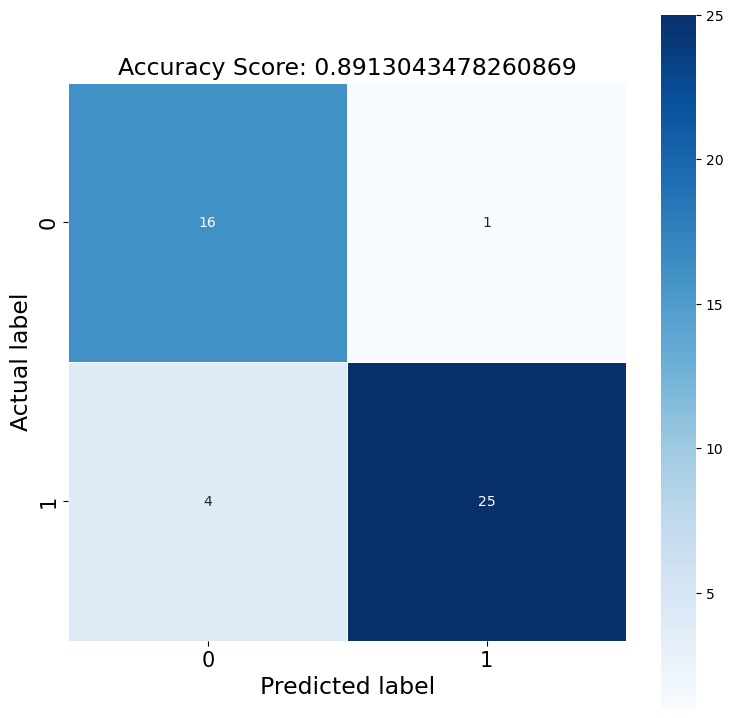

In [106]:
from sklearn import metrics
import seaborn as sns
score=model.score(X_test,y_test)
cm = metrics.confusion_matrix(y_test, pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

## Classification Report Logistics Regression

In [107]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.96      0.86      0.91        29

    accuracy                           0.89        46
   macro avg       0.88      0.90      0.89        46
weighted avg       0.90      0.89      0.89        46



In [111]:
## predicition 
model.predict(X_test[1].reshape(1,-1))

array([1], dtype=int64)

## Decision Tree

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y,
                                                    train_size = 0.8,
                                                    random_state = 1234) 

In [200]:
grid = {'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 3, 4,5],
         'min_samples_leaf': range(1, 9)}

 ## Prune the Classification Tree

In [209]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gsv = GridSearchCV(classifier,param_grid=grid)
gsv.fit(X_train1,y_train1)
model_ = gsv.best_estimator_
model_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=1234)

In [210]:
print('Training accuracy:',model_.score(X_train1, y_train1))
print('Test accuracy:', model_.score(X_test1, y_test1))

Training accuracy: 0.8406593406593407
Test accuracy: 0.9130434782608695


In [211]:
pred1 = model_.predict(X_test1)

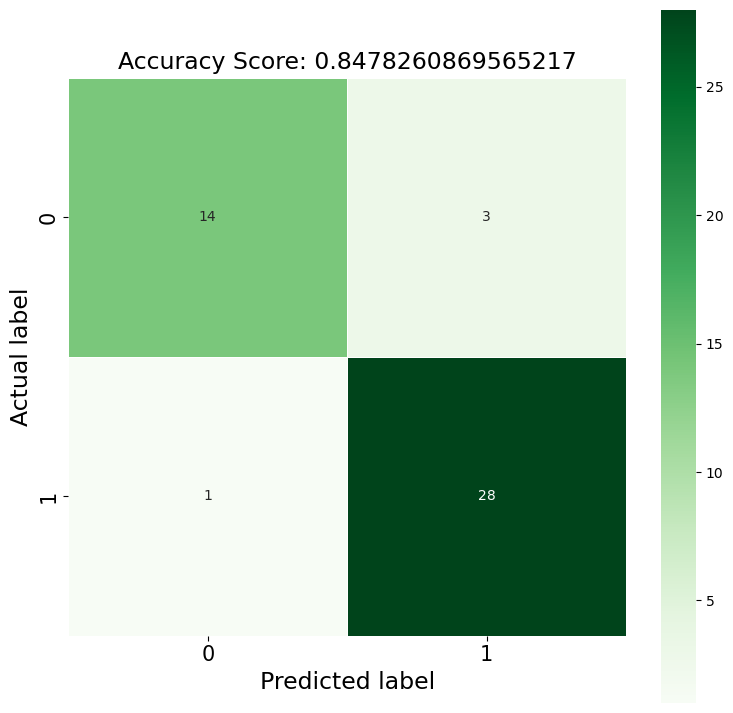

In [212]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test1, pred1)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Greens');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(y_score), size = 17);
plt.tick_params(labelsize= 15)

In [213]:
print(metrics.classification_report(y_test1,pred1))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.90      0.97      0.93        29

    accuracy                           0.91        46
   macro avg       0.92      0.89      0.90        46
weighted avg       0.91      0.91      0.91        46



In [220]:
model_.predict(X_test1[0:2])

array([1, 1], dtype=int64)